In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


In [111]:
data = np.loadtxt("rawdata.txt")

In [112]:
len(data)

21188

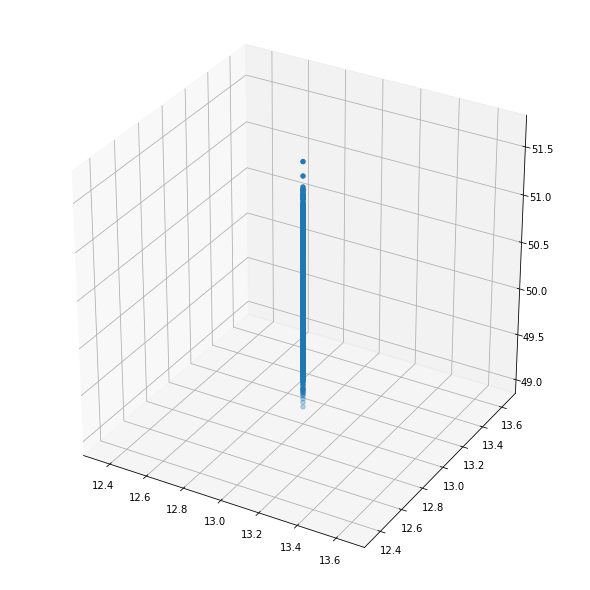

In [113]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(np.ceil(data[:,0]/4), np.ceil(data[:,1]/4), data[:,2])
plt.show()

In [114]:
X_pix = []
Y_pix = []
time  = []

for x in range(0,len(data[:,0])):
    if (np.ceil(data[:,0]/4)[x]==13) and (np.ceil(data[:,1]/4)[x]==13):
        X_pix.append(np.ceil(data[:,0]/4)[x])
        Y_pix.append(np.ceil(data[:,1]/4)[x])
        time.append(data[:,2][x])


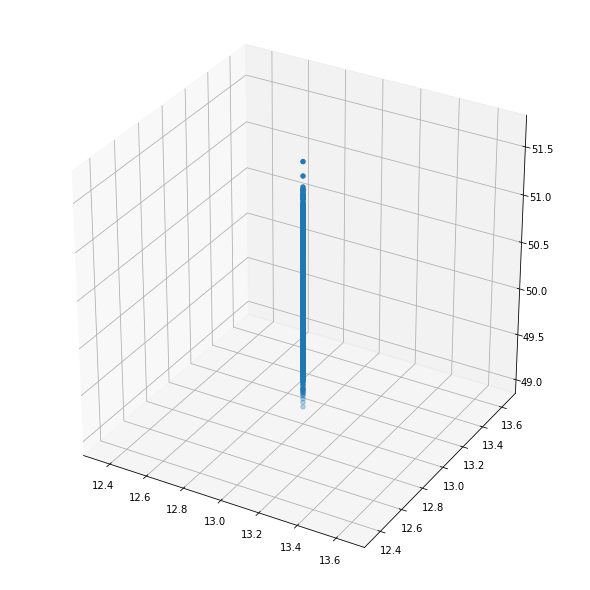

In [115]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(X_pix, Y_pix, time)
plt.show()

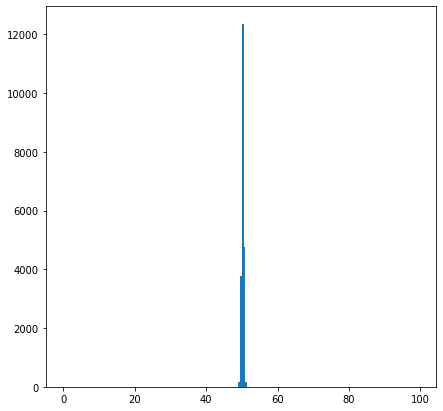

In [116]:
plt.figure(figsize=(7,7))
bins = np.arange(0,100,0.5)
plt.hist(time,bins=bins)
plt.show()

In [117]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

[2.73754121e+03 5.02791487e+01 3.08420240e-01]


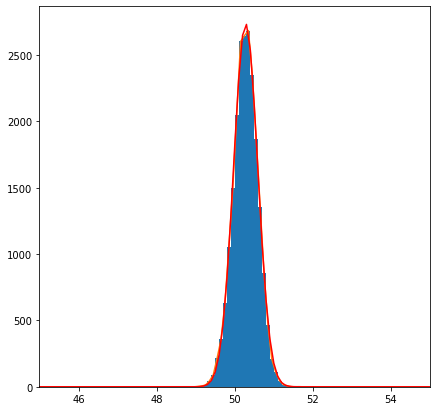

In [118]:
plt.figure(figsize=(7,7))
bins = np.arange(40,60,0.1)
plt.hist(time,bins=bins)

a,b = np.histogram(time,bins=bins)
#bn = b[1:]
bn = (b[1:] + b[:-1])/2
#a[bn>49.3]=0
plt.plot(bn,a)

popt,pcov = curve_fit(gaus,bn,a,p0=[1,50,0.5])
print(popt)

xval = np.arange(40,60,0.1)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')

plt.xlim(45,55)

plt.show()

In [119]:
E_vel = 1.648#; //mm/mus
DiffusionL = 682.23/1e6#;  //mm**2/mus
DiffusionT = 1315.86/1e6#; //mm**2/mus

In [120]:
(((popt[2])**2)/(2*DiffusionL))

69.71479158421667

In [121]:
popt[1]*E_vel

82.86003707662033

In [122]:
G4data = np.loadtxt("test_1MeV.txt")

In [124]:
G4X = G4data[:,1]
G4Y = G4data[:,2]
G4Z = G4data[:,3]
G4E = G4data[:,4]

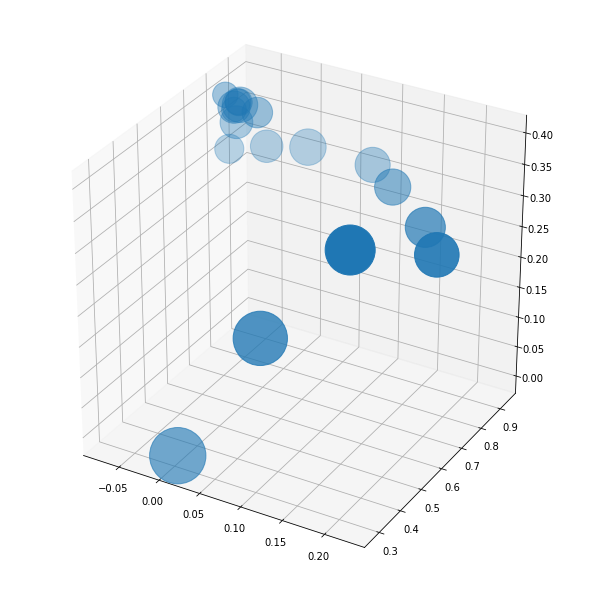

In [131]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(G4X, G4Y, G4Z,s=G4E*5e4)
plt.show()

In [134]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1)[0]
s

0.002325266511029903

In [136]:
Wvalue = 23.6

In [210]:
DX = []
DY = []
DZ = []
for x in range(0,len(G4E)):
    Nelectron = int(round(G4E[x]*1e6/Wvalue))#*10
    for q in range(0,Nelectron):
    
        T_drift = (5000+G4Z[x])/E_vel
        sigma_T = np.sqrt(2*DiffusionT*T_drift)
        sigma_L = np.sqrt(2*DiffusionL*T_drift)
        
        #DX.append(np.random.normal(G4X[x], sigma_T, 1)[0])
        #DY.append(np.random.normal(G4Y[x], sigma_T, 1)[0])
        DZ.append(np.random.normal(5000+G4Z[x], sigma_L, 1)[0])

In [178]:
sigma_L

0.2042544300503224

ValueError: shape mismatch: objects cannot be broadcast to a single shape

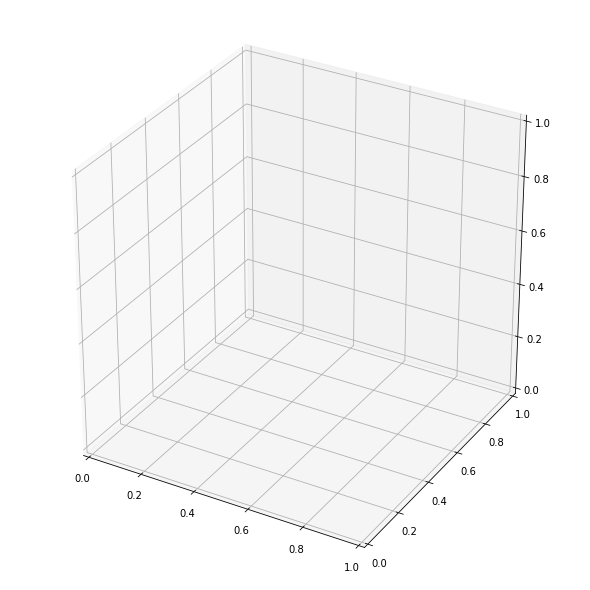

In [179]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(DX, DY, DZ)
plt.show()

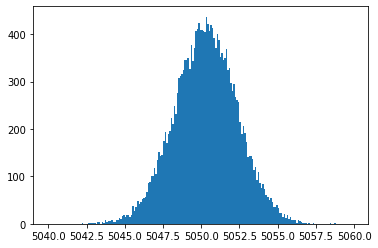

In [211]:
bins = np.arange(5040,5060,0.1)
plt.hist(DZ,bins=bins)

plt.show()

[ 4.10125846e+03  5.05030899e+03 -2.05715673e+00]


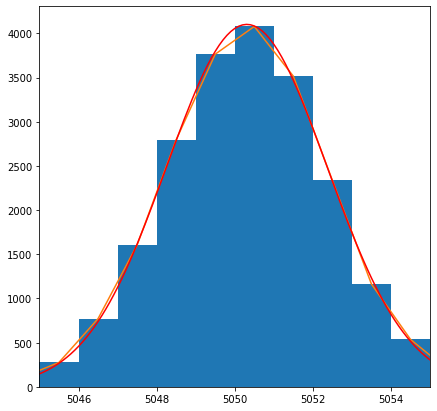

In [224]:
plt.figure(figsize=(7,7))
bins = np.arange(5040,5060,1)
plt.hist(DZ,bins=bins)

a,b = np.histogram(DZ,bins=bins)
#bn = b[1:]
bn = (b[1:] + b[:-1])/2
#a[bn>49.3]=0
plt.plot(bn,a)

popt,pcov = curve_fit(gaus,bn,a,p0=[1,5050,1])
print(popt)

xval = np.arange(5040,5060,0.1)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')

plt.xlim(5045,5055)

plt.show()

In [220]:
popt[2]

-2.0571567288720503

In [221]:
((((sigma_L)**2)/(2*DiffusionL)))*E_vel

5050.389420999998

In [222]:
T_drift

3064.5566875

In [223]:
((((popt[2])**2)/(2*DiffusionL)))*E_vel

5111.297505366648

In [183]:
G4Z = np.array(G4Z+50)

[9.52858437e+00 5.03540944e+01 3.22303031e-02]


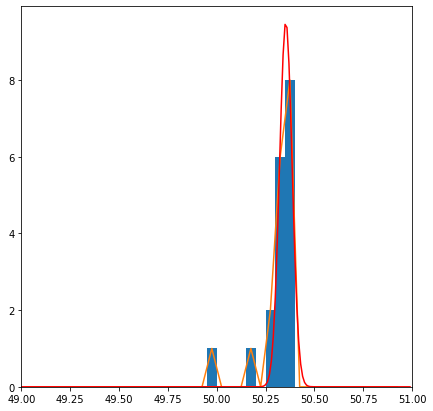

In [191]:
plt.figure(figsize=(7,7))
bins = np.arange(49,51,0.05)
plt.hist(G4Z,bins=bins)

a,b = np.histogram(G4Z,bins=bins)
#bn = b[1:]
bn = (b[1:] + b[:-1])/2
#a[bn>49.3]=0
plt.plot(bn,a)

popt,pcov = curve_fit(gaus,bn,a,p0=[1,50,0.1])
print(popt)

xval = np.arange(49,51,0.01)
plt.plot(xval,gaus(xval,*popt),color='r',label='fit')

plt.xlim(49,51)

plt.show()

In [192]:
((((0.23605913805091783)**2 - (.1)**2)/(2*DiffusionL)))*E_vel

55.225521196150915